## Preprocessing and Model training

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [64]:
## Load the data

df = pd.read_csv("covtype.csv")

In [65]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [66]:
#numeric features
numeric_features = [feature for feature in df.columns if df[feature].dtype!='0']
print(f"there are {len(numeric_features)} numeric features")

there are 55 numeric features


In [67]:
#categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype=='0']
print(f"there are {len(categorical_features)} categorical_features")

there are 0 categorical_features


In [68]:
#discrete features
discrete_features = [feature for feature in numeric_features if (len(df[feature].unique())<=25)]
print(f"there are {len(discrete_features)} discrete features")
print(discrete_features)

there are 45 discrete features
['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']


In [69]:
#continous features
continous_features = [feature for feature in numeric_features if (len(df[feature].unique())>25)]
print(f"there are {len(continous_features)} continous features")
print(continous_features)

there are 10 continous features
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


### Removing And Detecting Outliers

There are two methods of determining the outliers
1. KDE plots
2. Inter Quartile methods


###### Lets check the outliers in the given dataset for each columns for the numerical values

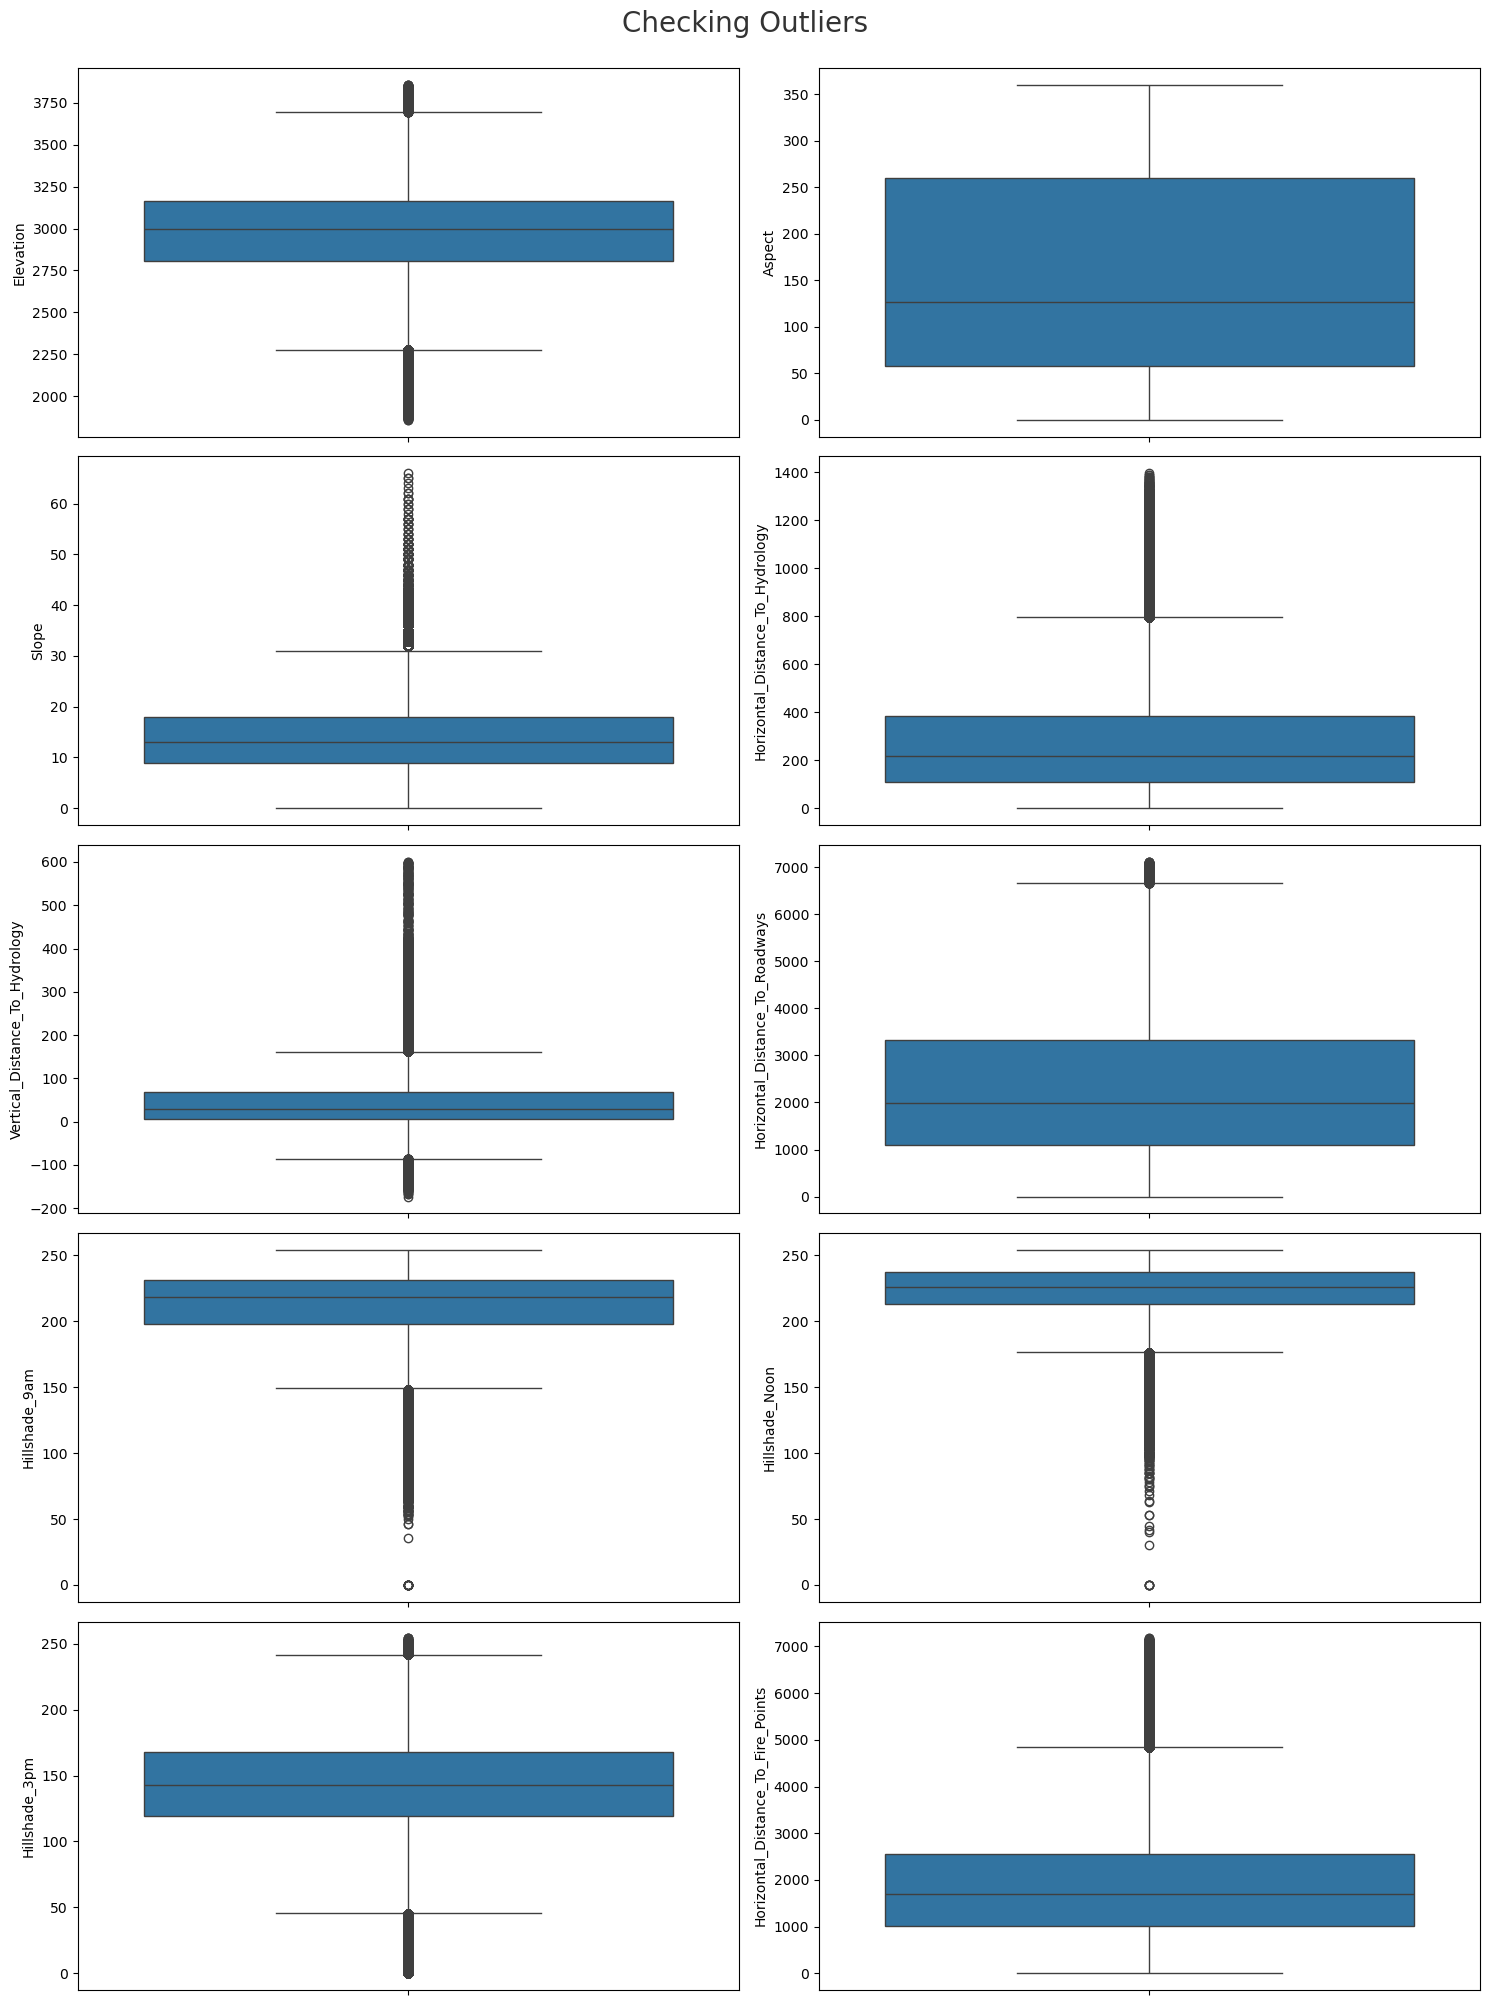

In [73]:
plt.figure(figsize=(15,20))
plt.suptitle("Checking Outliers", fontsize=20,alpha = 0.8,y=1)
for i in range(0,len(continous_features)):
    plt.subplot(5,2,i+1)
    sns.boxplot(df[continous_features[i]])
    plt.tight_layout()

Except Aspect all others have outliers and The distribution followed by the data set while plotting KDE plots that the data is Skewed so we use IQR method for removing the outliers

In [75]:
df1=df.copy()

def detect_and_capping_outliers(col):
    ## calculating IQR
    perc25 = df1[col].quantile(0.25)
    perc75 = df1[col].quantile(0.75)
    iqr = perc75-perc25
    upper_limit = perc75 + 1.5* iqr
    lower_limit = perc25 - 1.5* iqr
    df1.loc[(df[col]>upper_limit),col] = upper_limit
    df1.loc[(df[col]<lower_limit),col] = lower_limit
    return df1

In [76]:
for col in continous_features:
    detect_and_capping_outliers(col)

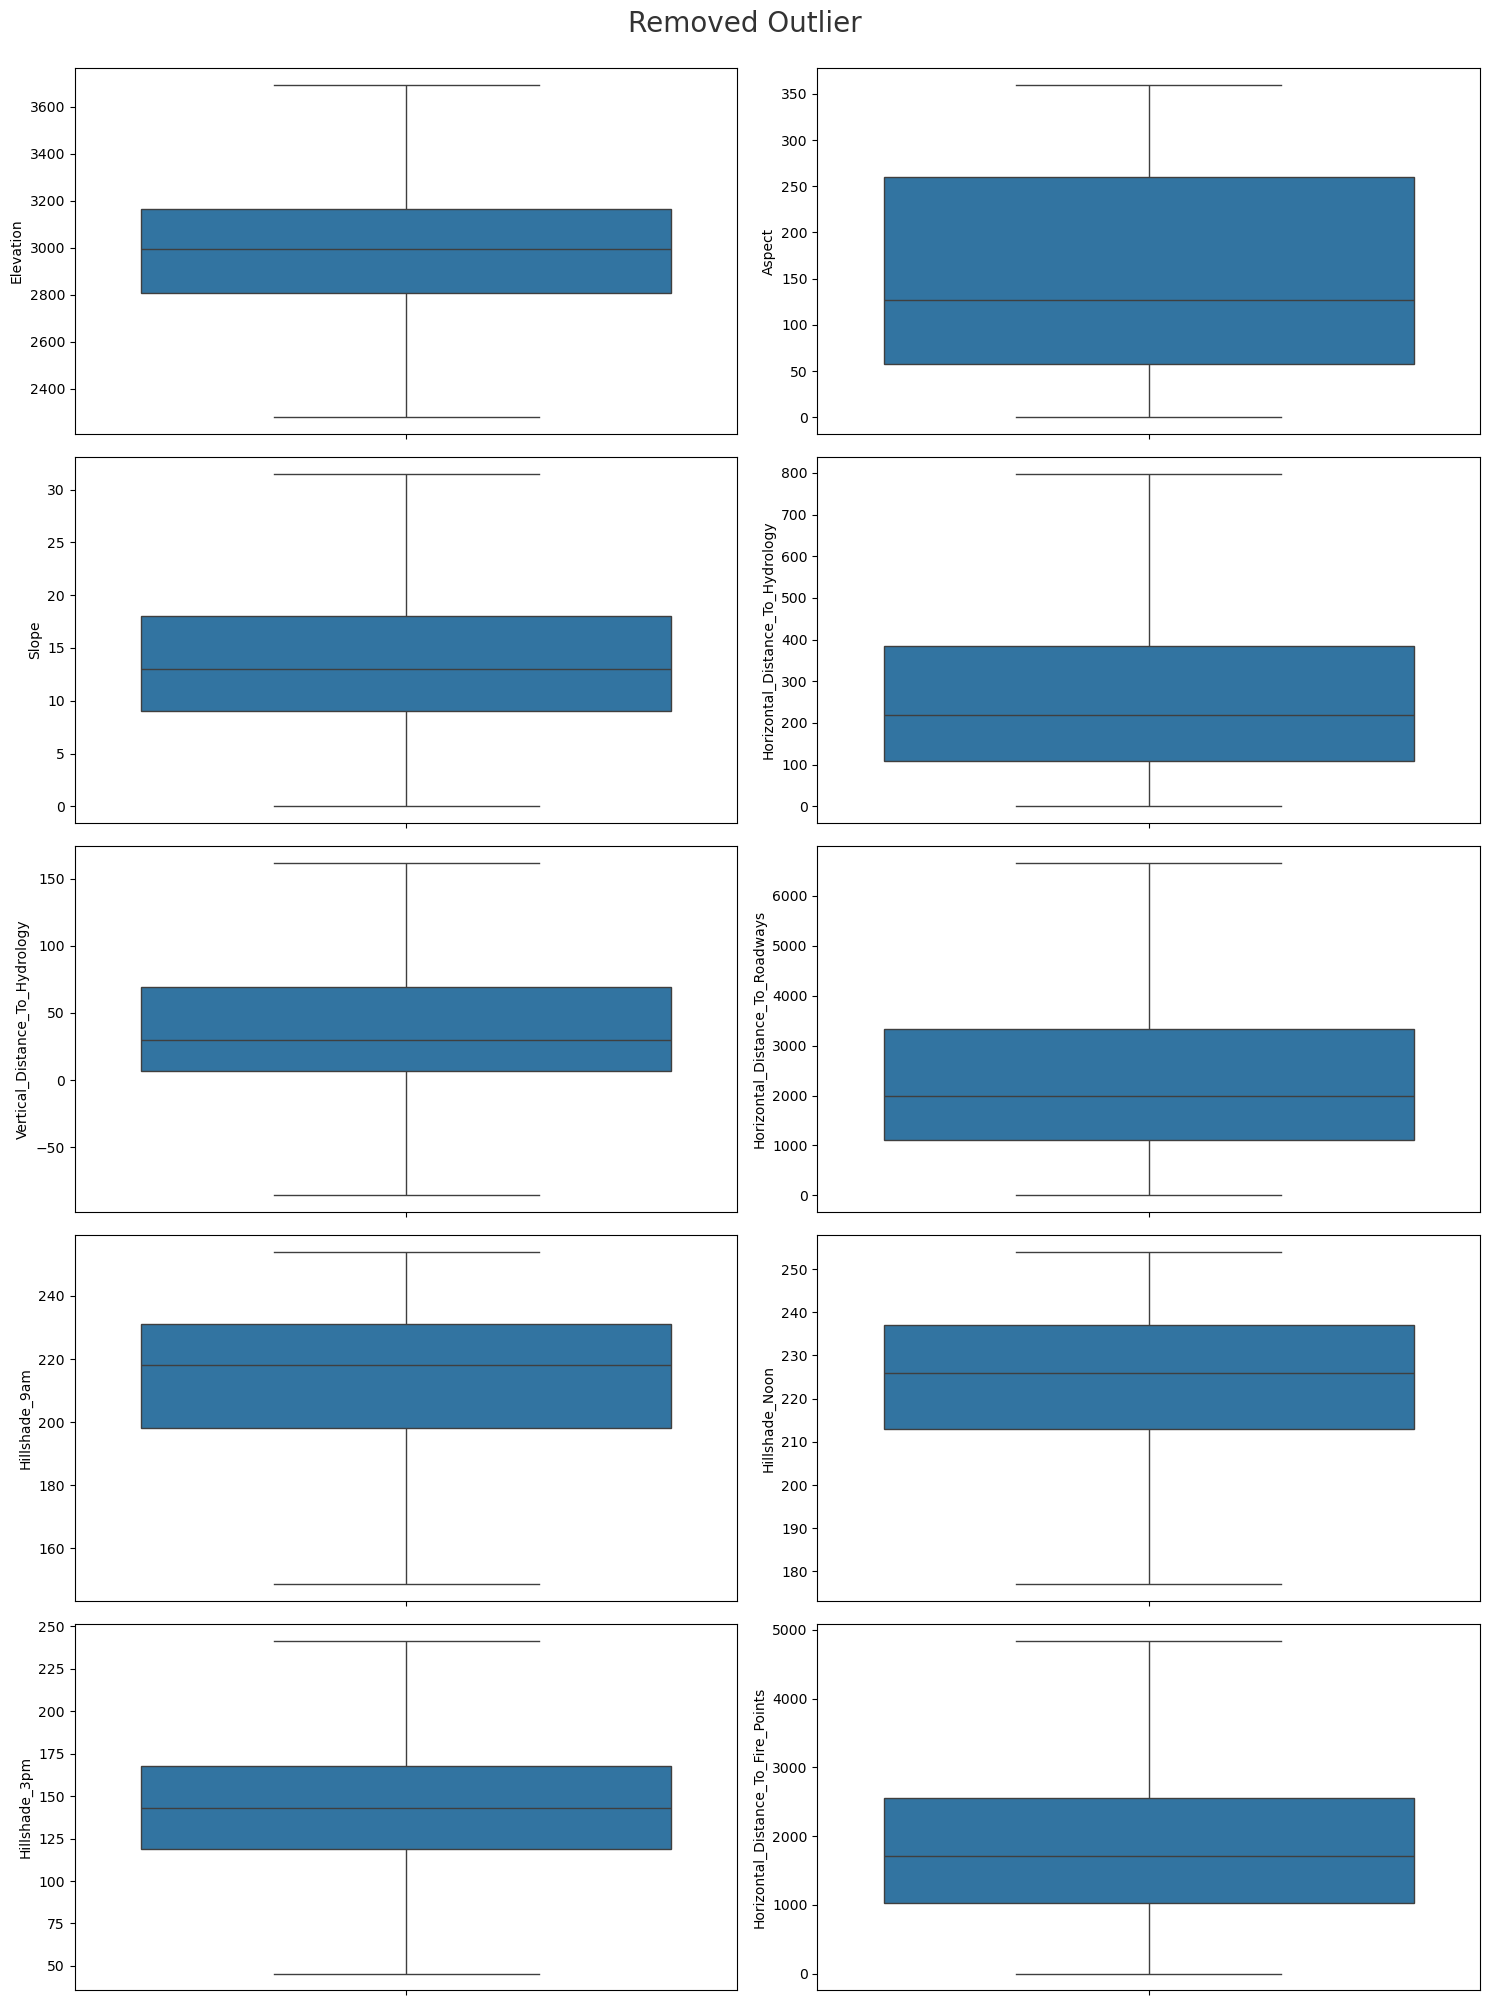

In [77]:
plt.figure(figsize=(15,20))
plt.suptitle("Removed Outlier", fontsize=20,alpha = 0.8,y=1)
for i in range(0,len(continous_features)):
    plt.subplot(5,2,i+1)
    sns.boxplot(df1[continous_features[i]])
    plt.tight_layout()

In [78]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [79]:
df['Wilderness_Area'] = (df.iloc[:,10:15]==1).idxmax(1)
wilderness_area = sorted(df['Wilderness_Area'].value_counts().index.tolist())
wilderness_area

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4']

In [80]:
def split_numbers_chars(row):
    head = row.rstrip("0123456789")
    tail = row[len(head):]
    return head,tail
def reverse_one_hot_encoded(dataframe,start_loc,end_loc,numeric_column):
    dataframe['String'] =(dataframe.iloc[:,start_loc:end_loc]==1).idxmax(1)
    dataframe['Number'] = dataframe['String'].apply(split_numbers_chars)
    dataframe[numeric_column] = dataframe['Number'].apply(lambda x : x[1]).astype('int64')
    dataframe.drop(columns=['String','Number'], inplace=True)

In [81]:
df1= df.copy()
reverse_one_hot_encoded(df1,14,56,'Soil_Types')

In [82]:
feature_name = continous_features + wilderness_area + ["Soil_Types"] + ["Cover_Type"]
all_features =df1[feature_name]
all_features

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Types,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,2,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,2,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,2,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,2,3


In [83]:
def split_and_scale_data(df): 
    df=df.copy()
    X = df.drop('Cover_Type',axis=1) #features
    y = df['Cover_Type'] # Target variable
    
    ## train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ## Scaling the data
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    return X_train,X_test,y_train,y_test,

In [84]:
def evaluate_model(model,balanced,X_test,y_test):
    model_accuracy = model.score(X_test,y_test)
    print(f"Accuracy : {model_accuracy*100} % ")
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    c1_report = classification_report(y_test,y_pred)
    
    plt.figure(figsize=(20,10))
    sns.heatmap(cm,annot=True,cmap='RdYlGn',cbar=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print(c1_report)
    return model_accuracy


##### As per last observation on the dataset we have arrived at conclusion that the target i.e Cover_type is an imbalanced feature as per the below graph using the countplot

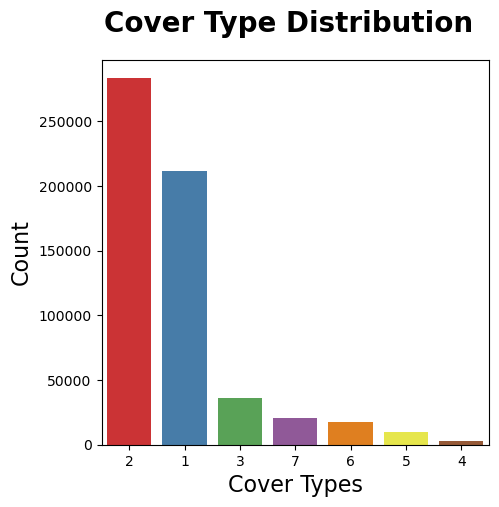

In [86]:
plt.figure(figsize=(5,5))
sns.countplot(x ='Cover_Type',data = df,order=df['Cover_Type'].value_counts().index,palette='Set1')
plt.suptitle("Cover Type Distribution",fontsize=20,weight='bold')
plt.xlabel("Cover Types",fontsize=16 )
plt.ylabel("Count",fontsize=16)
plt.show()

###### We might have two options
1. Undersampling
2. Oversampling
###### We prefer Oversampling as we don't want the data to be lost while undersampling as some if class like cover_type 4 as compared cover_type 2 is large.


In [88]:
oversampled_data = all_features.copy()
max_value = np.max(oversampled_data['Cover_Type'].value_counts())
print(f"The size of the largest class: {max_value}")

The size of the largest class: 283301


In [89]:
X = oversampled_data.drop(['Cover_Type'], axis=1)
y = oversampled_data['Cover_Type']

In [90]:
X.shape,y.shape

((581012, 15), (581012,))

In [115]:
from imblearn.over_sampling import SMOTE
rs = SMOTE(sampling_strategy = 'all',random_state=42)
X_resample,y_resample = rs.fit_resample(X,y)

In [117]:
type(X_resample),type(y_resample)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [119]:
over_sampled_data = pd.concat([pd.DataFrame(X_resample),pd.DataFrame(y_resample)],axis=1)
over_sampled_data = over_sampled_data.sample(frac=1.0,random_state=42)
over_sampled_data.reset_index(drop =True)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Types,Cover_Type
0,2203,350,22,197,42,615,173,195,156,639,0,0,0,1,10,3
1,3395,54,12,255,46,3078,227,212,116,1484,0,0,1,0,38,7
2,2679,0,7,361,16,1600,210,228,155,6044,1,0,0,0,12,2
3,3232,30,8,0,0,1832,218,223,140,1518,1,0,0,0,29,2
4,3409,200,11,1051,60,3207,216,250,167,1290,0,0,1,0,38,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983102,3172,156,29,716,291,1154,237,228,98,2837,1,0,0,0,29,1
1983103,2677,159,8,5,1,2502,226,241,145,2344,1,0,0,0,30,5
1983104,3065,348,21,124,19,4725,177,202,159,624,1,0,0,0,29,2
1983105,2267,317,16,268,132,582,174,223,187,377,0,0,0,1,6,3


In [121]:
over_sampled_data['Cover_Type'].value_counts()

Cover_Type
3    283301
7    283301
2    283301
6    283301
1    283301
4    283301
5    283301
Name: count, dtype: int64

In [135]:
X_train,X_test,y_train,y_test = split_and_scale_data(over_sampled_data)

In [137]:
X_train.shape,y_train.shape

((1586485, 15), (1586485,))

### Model - Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier
rcf = RandomForestClassifier()
rcf.fit(X_train,y_train)

RandomForestClassifier()

roc score 0.9998309304228687
Accuracy : 99.05779306241207 % 


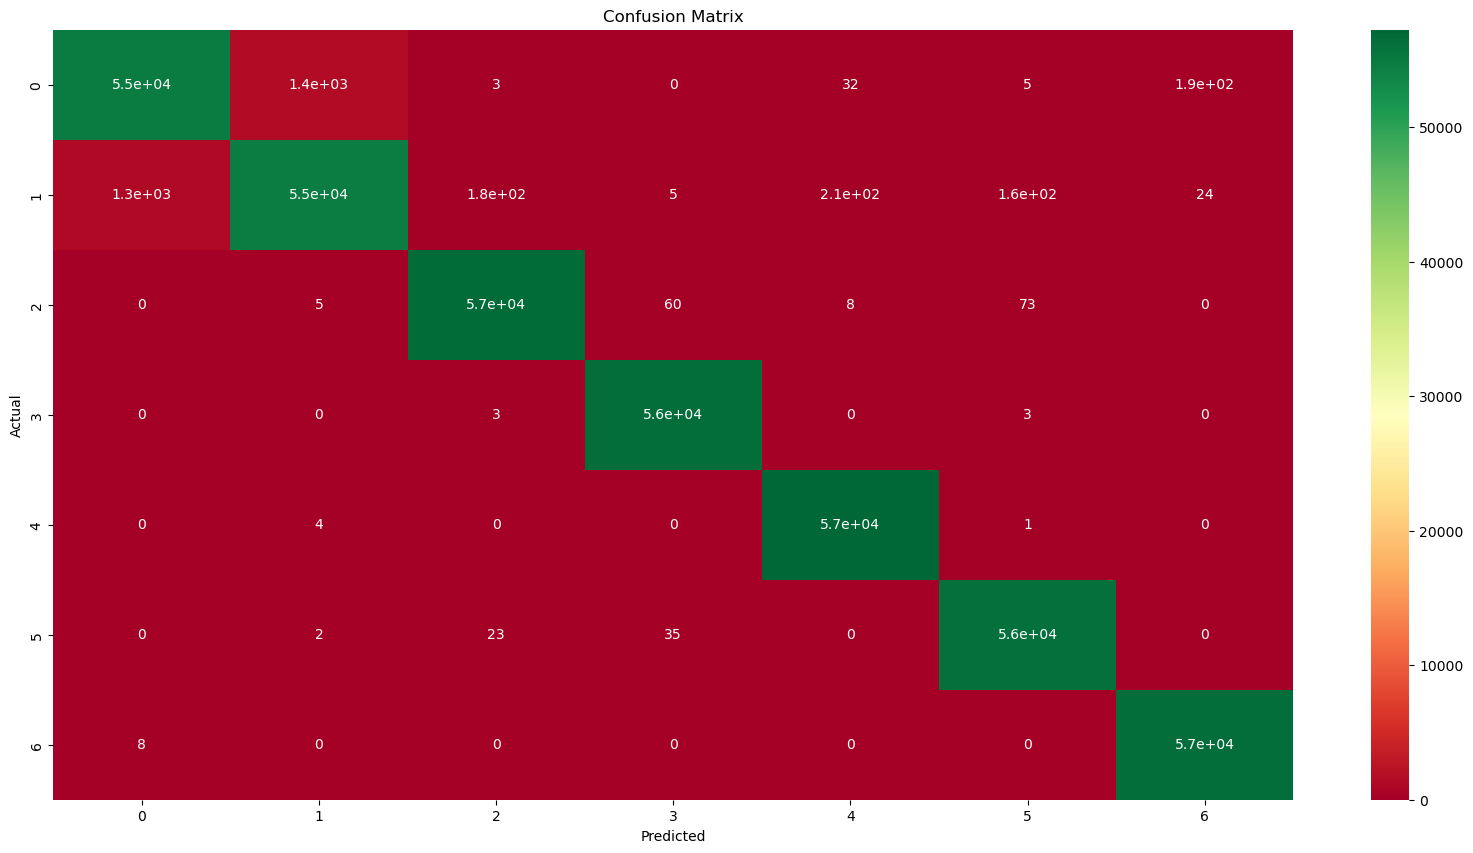

              precision    recall  f1-score   support

           1       0.98      0.97      0.97     56640
           2       0.97      0.97      0.97     56451
           3       1.00      1.00      1.00     56908
           4       1.00      1.00      1.00     56387
           5       1.00      1.00      1.00     57256
           6       1.00      1.00      1.00     56414
           7       1.00      1.00      1.00     56566

    accuracy                           0.99    396622
   macro avg       0.99      0.99      0.99    396622
weighted avg       0.99      0.99      0.99    396622



In [151]:
#Make predictions
y_pred_rfc = rcf.predict_proba(X_test)
rf_auc = roc_auc_score(y_test,y_pred_rfc,multi_class="ovr")
print("roc score", rf_auc)
rf_accuracy = evaluate_model(rcf,"Balanced Data",X_test,y_test)

### Model  - Extra Trees Classifier

In [153]:
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(X_train,y_train)

ExtraTreesClassifier()

roc auc score 0.9998122776842912
Accuracy : 99.02526839156678 % 


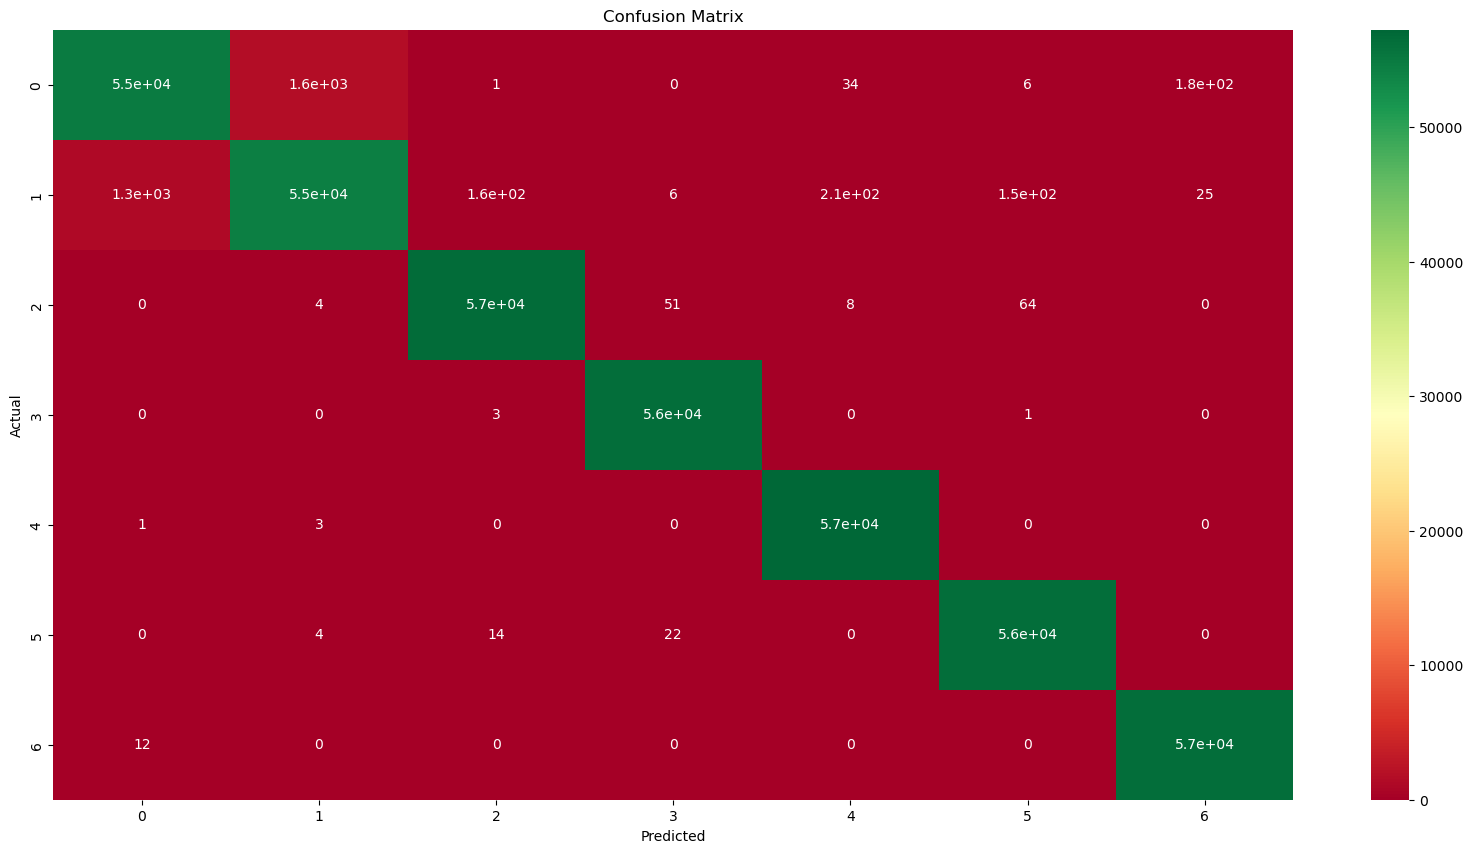

              precision    recall  f1-score   support

           1       0.98      0.97      0.97     56640
           2       0.97      0.97      0.97     56451
           3       1.00      1.00      1.00     56908
           4       1.00      1.00      1.00     56387
           5       1.00      1.00      1.00     57256
           6       1.00      1.00      1.00     56414
           7       1.00      1.00      1.00     56566

    accuracy                           0.99    396622
   macro avg       0.99      0.99      0.99    396622
weighted avg       0.99      0.99      0.99    396622



In [155]:
y_pred_ext = ext.predict_proba(X_test)
ext_roc = roc_auc_score(y_test,y_pred_ext,multi_class='ovr')
print("roc auc score",ext_roc)
ext_accuracy = evaluate_model(ext,"Balanced",X_test,y_test)

### Model  - Light Gradient Boosting

In [159]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2088
[LightGBM] [Info] Number of data points in the train set: 1586485, number of used features: 15
[LightGBM] [Info] Start training from score -1.945821
[LightGBM] [Info] Start training from score -1.944987
[LightGBM] [Info] Start training from score -1.947004
[LightGBM] [Info] Start training from score -1.944705
[LightGBM] [Info] Start training from score -1.948542
[LightGBM] [Info] Start training from score -1.944824
[LightGBM] [Info] Start training from score -1.945494


LGBMClassifier()

roc auc score 0.9933215754307633
Accuracy : 91.56879850336088 % 


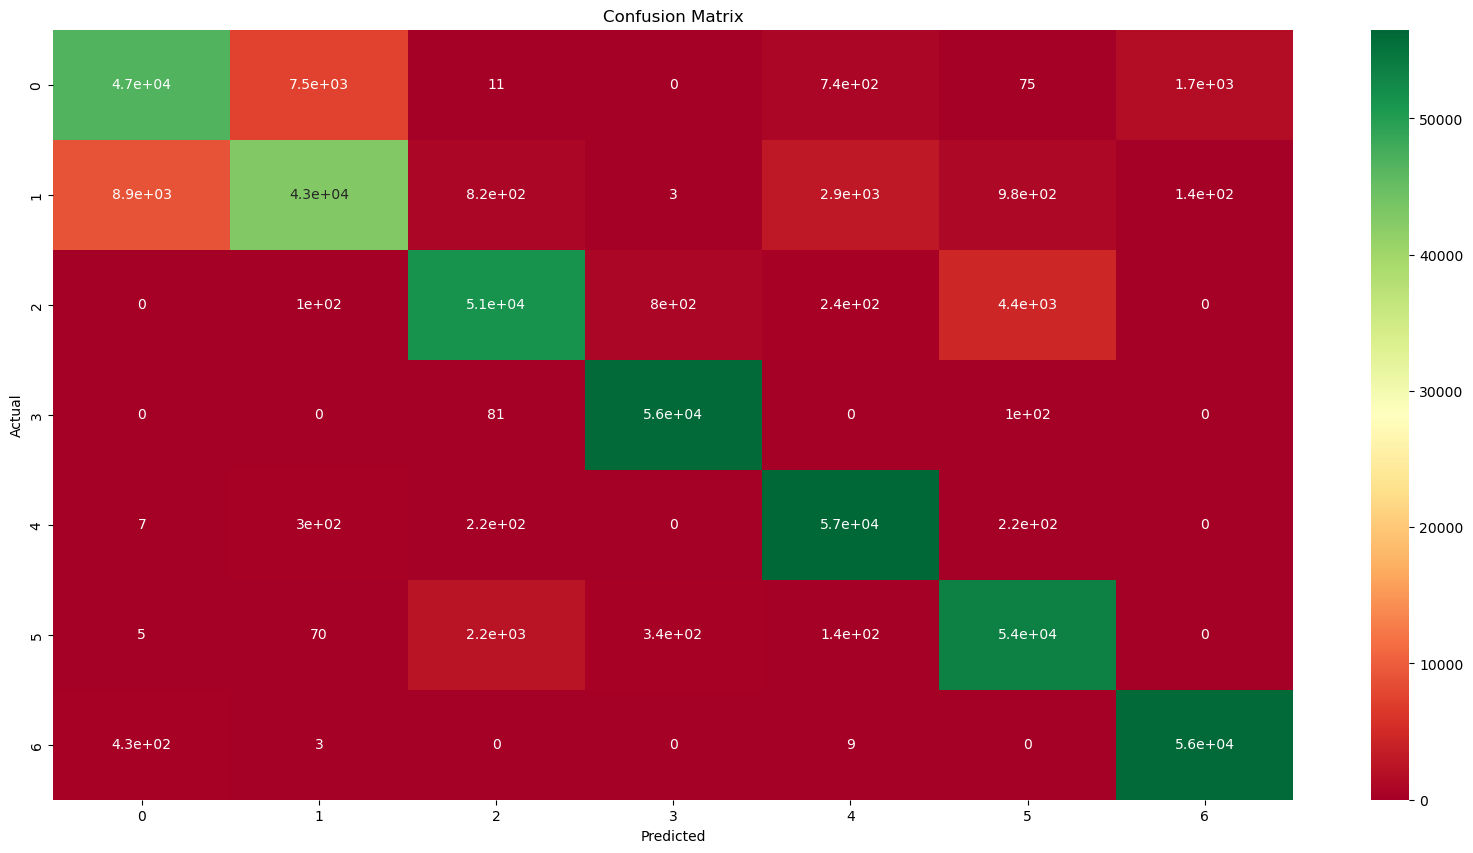

              precision    recall  f1-score   support

           1       0.83      0.82      0.83     56640
           2       0.84      0.76      0.80     56451
           3       0.94      0.90      0.92     56908
           4       0.98      1.00      0.99     56387
           5       0.93      0.99      0.96     57256
           6       0.90      0.95      0.93     56414
           7       0.97      0.99      0.98     56566

    accuracy                           0.92    396622
   macro avg       0.91      0.92      0.91    396622
weighted avg       0.91      0.92      0.91    396622



In [169]:
y_pred_lgbm = lgbm.predict_proba(X_test)
lgbm_roc = roc_auc_score(y_test,y_pred_lgbm,multi_class='ovr')
print("roc auc score",lgbm_roc)
lgbm_accuracy = evaluate_model(lgbm,"Balanced",X_test,y_test)

### Model  - Catboost Classifier

In [163]:
from catboost import CatBoostClassifier
ctb = CatBoostClassifier(verbose=True)
ctb.fit(X_train,y_train)

Learning rate set to 0.115225
0:	learn: 1.6902093	total: 927ms	remaining: 15m 26s
1:	learn: 1.5121306	total: 1.61s	remaining: 13m 25s
2:	learn: 1.3942043	total: 2.05s	remaining: 11m 20s
3:	learn: 1.2993094	total: 2.44s	remaining: 10m 6s
4:	learn: 1.2215417	total: 2.85s	remaining: 9m 27s
5:	learn: 1.1556251	total: 3.24s	remaining: 8m 56s
6:	learn: 1.1002298	total: 3.65s	remaining: 8m 38s
7:	learn: 1.0517131	total: 4.03s	remaining: 8m 19s
8:	learn: 1.0114880	total: 4.39s	remaining: 8m 4s
9:	learn: 0.9727116	total: 4.77s	remaining: 7m 52s
10:	learn: 0.9396435	total: 5.22s	remaining: 7m 49s
11:	learn: 0.9107996	total: 5.73s	remaining: 7m 51s
12:	learn: 0.8859804	total: 6.1s	remaining: 7m 42s
13:	learn: 0.8637913	total: 6.48s	remaining: 7m 36s
14:	learn: 0.8423912	total: 6.88s	remaining: 7m 31s
15:	learn: 0.8233911	total: 7.28s	remaining: 7m 27s
16:	learn: 0.8049266	total: 7.69s	remaining: 7m 24s
17:	learn: 0.7899585	total: 8.09s	remaining: 7m 21s
18:	learn: 0.7763518	total: 8.46s	remaining

roc auc score 0.9955345321097164
Accuracy : 93.28831986122808 % 


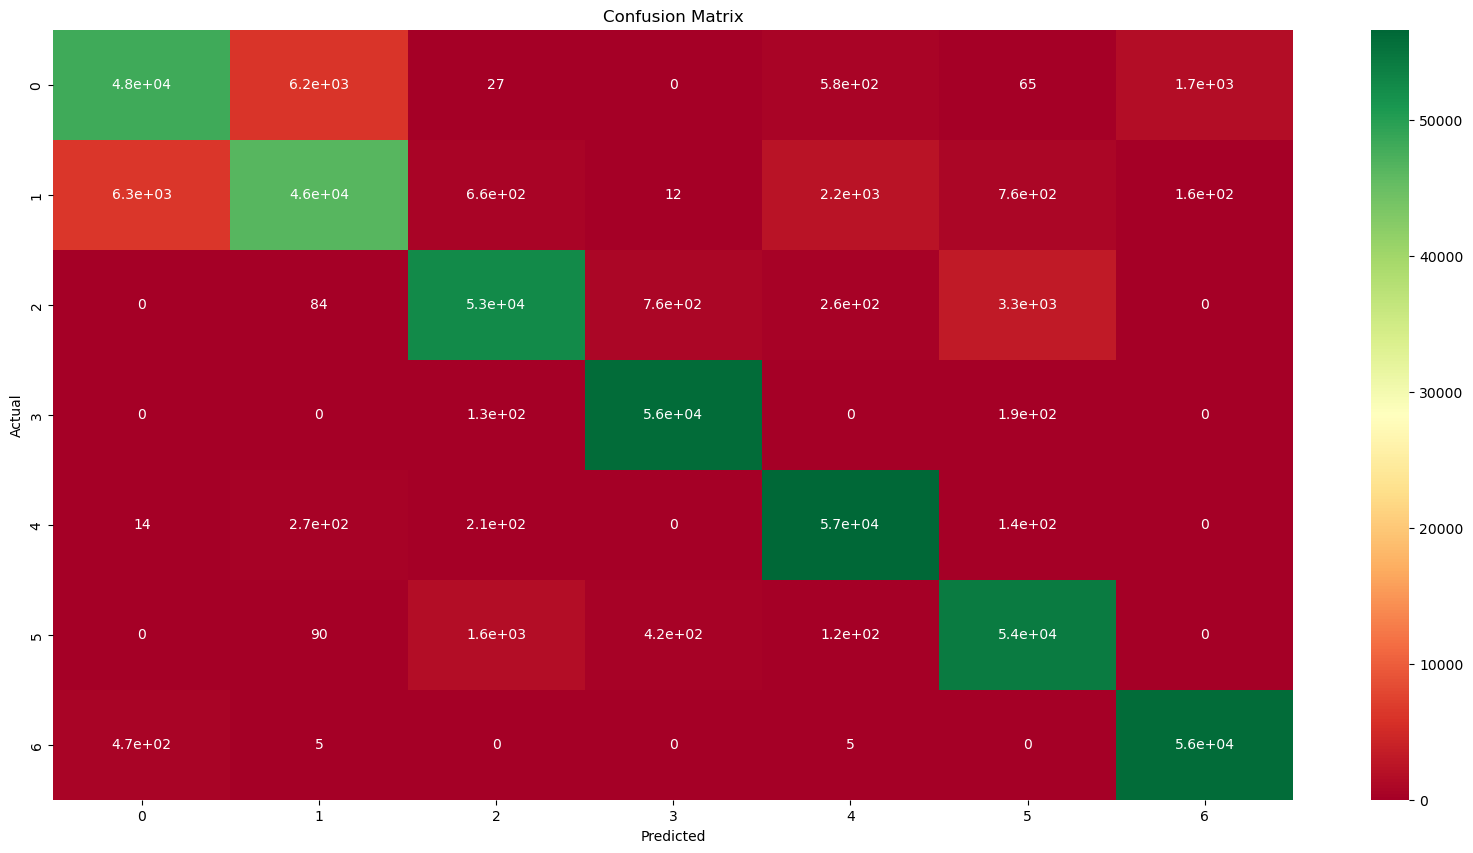

              precision    recall  f1-score   support

           1       0.88      0.85      0.86     56640
           2       0.88      0.82      0.85     56451
           3       0.95      0.92      0.94     56908
           4       0.98      0.99      0.99     56387
           5       0.95      0.99      0.97     57256
           6       0.92      0.96      0.94     56414
           7       0.97      0.99      0.98     56566

    accuracy                           0.93    396622
   macro avg       0.93      0.93      0.93    396622
weighted avg       0.93      0.93      0.93    396622



In [171]:
y_pred_catb = ctb.predict_proba(X_test)
catb_roc = roc_auc_score(y_test,y_pred_catb,multi_class='ovr')
print("roc auc score",catb_roc)
catb_accuracy = evaluate_model(ctb,"Balanced",X_test,y_test)

### Performance Comparison

In [181]:
performance_comparison = pd.DataFrame({"Model_Name": ["Random Forest Classifier","Extra Trees Classifier","Light Gradient Boosting","Catboost Classifier"],
                                       "Accuracy":[rf_accuracy,ext_accuracy,lgbm_accuracy,catb_accuracy]})
performance_comparison.sort_values(by="Accuracy",ascending=False)

,Model_Name,Accuracy
0,Random Forest Classifier,0.990578
1,Extra Trees Classifier,0.990253
3,Catboost Classifier,0.932883
2,Light Gradient Boosting,0.915688


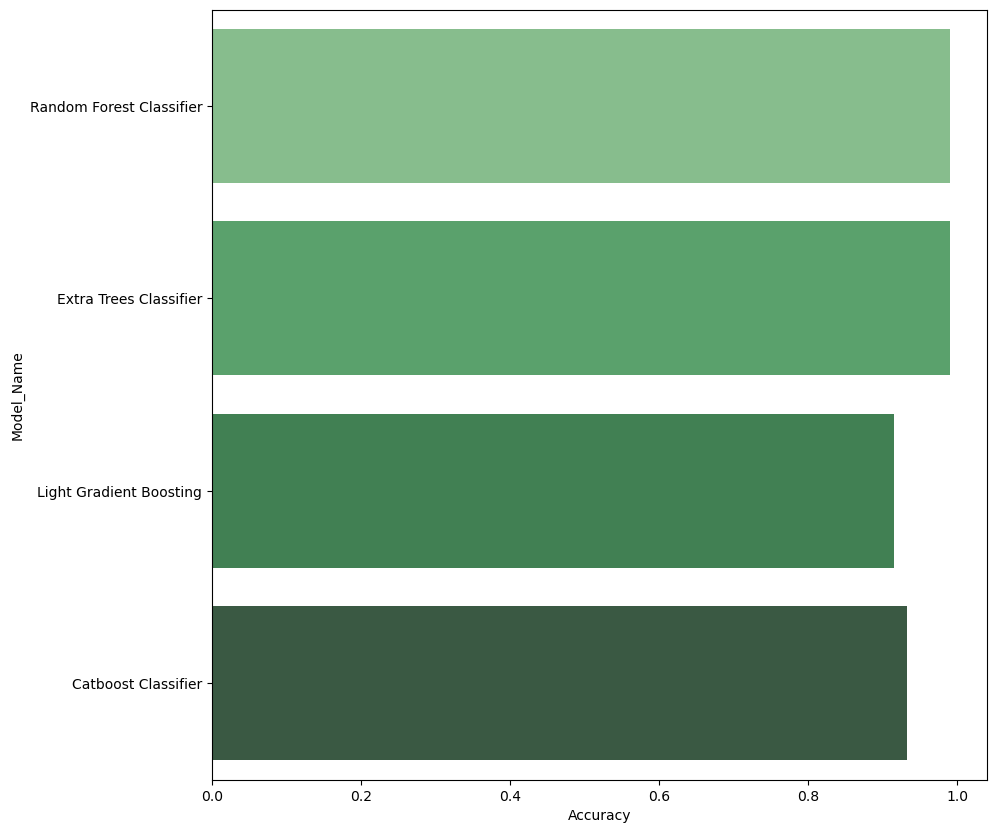

In [191]:
plt.figure(figsize=(10,10))
ax =  sns.barplot(data =performance_comparison, x='Accuracy', y ="Model_Name", palette= "Greens_d")

#### From the above observation we can see that the random forest classifier has the highest model accuracy

Let's save the model using pickle

In [197]:
import pickle

pickle.dump(rcf, open("rcf_classifier.pkl","wb"))